In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Full Batch Gradient Descent

In [2]:
class GD:
  def __init__(self,epsilon,alpha,epochs = False):
    self.epsilon = epsilon
    self.alpha = alpha
    self.epochs = epochs

    self.Theta_Array = []
    self.error_plot = []
    self.epoch = 0 ;
    self.minimizer = None
    self.X_New = None ; self.y = None
    self.theta = None

  def MSE(self,y,y_hat):
    return np.linalg.norm(y-y_hat) ** 2 / y.size

  def train(self,X,y,L_optimal,minimizer) :
    ones_column = np.ones((X.shape[0], 1)) # Preparing Data
    X_New = np.concatenate((ones_column,X),axis = 1) # Preparing Data

    theta = np.zeros((y.shape[1] + 1,1)) #Initialising weight vector
    # theta = np.array([103,104]).reshape((y.shape[1] + 1,1))
    Loss_gradient = 1e8
    self.Theta_Array.append((theta[0],theta[1]))

    self.minimizer = minimizer
    self.X_New = X_New ; self.y = y

    while (self.epochs and self.epoch < self.epochs) or ((not self.epochs) and True):
      y_hat = np.matmul(X_New,theta)

      Overall_Loss = self.MSE(y,y_hat)
      if abs(Overall_Loss - L_optimal) < self.epsilon : break

      gradient = -2 * np.matmul(X_New.transpose(), (y - y_hat))

      theta = theta - alpha * gradient

      self.epoch += 1
      self.Theta_Array.append((theta[0],theta[1]))
      self.error_plot.append(Overall_Loss)

    self.theta = theta

  def plotit(self,show):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    feature_x = np.linspace(-5, self.minimizer[0] + 5, 500)
    feature_y = np.linspace(-5, self.minimizer[1] + 5, 500)

    Z = np.zeros((len(feature_x), len(feature_y)))

    for i in range(len(feature_x)):
        for j in range(len(feature_y)):
            theta = np.array([feature_x[i], feature_y[j]]).reshape((2, 1))
            a = np.matmul(self.X_New, theta)
            Z[i, j] = self.MSE(a, self.y)

    ax1.contourf(feature_x, feature_y, Z.T)

    ax1.set_title('Filled Contour Plot')
    ax1.set_xlabel('feature_x')
    ax1.set_ylabel('feature_y')

    for i in range(len(self.Theta_Array)):
        ax1.plot(self.Theta_Array[i][0], self.Theta_Array[i][1], marker='o', color='red', markersize=0.5)

    ax2.plot(range(len(self.error_plot)), self.error_plot)
    ax2.set_title('Error Plot')
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Error')

    if show : plt.show()


In [4]:
def DataSet1():
    num_samples = 40
    np.random.seed(45)

    # Generate data
    x1 = np.random.uniform(-20, 20, num_samples)
    f_x = 100*x1 + 1
    eps = np.random.randn(num_samples)
    y = f_x + eps
    X = np.array(x1).reshape((x1.shape[0], 1))
    Y = np.array(y).reshape(y.shape[0],1)
    return [X,Y,(eps**2).mean(),(1,100)]

def DataSet2():
    np.random.seed(45)
    num_samples = 40

    # Generate data
    x1 = np.random.uniform(-1, 1, num_samples)
    f_x = 3*x1 + 4
    eps = np.random.randn(num_samples)
    y = f_x + eps

    X = np.array(x1).reshape((x1.shape[0], 1))
    Y = np.array(y).reshape(y.shape[0],1)
    return [X,Y,(eps**2).mean(),(4,3)]

323
[[ 0.76826744]
 [99.98165841]]


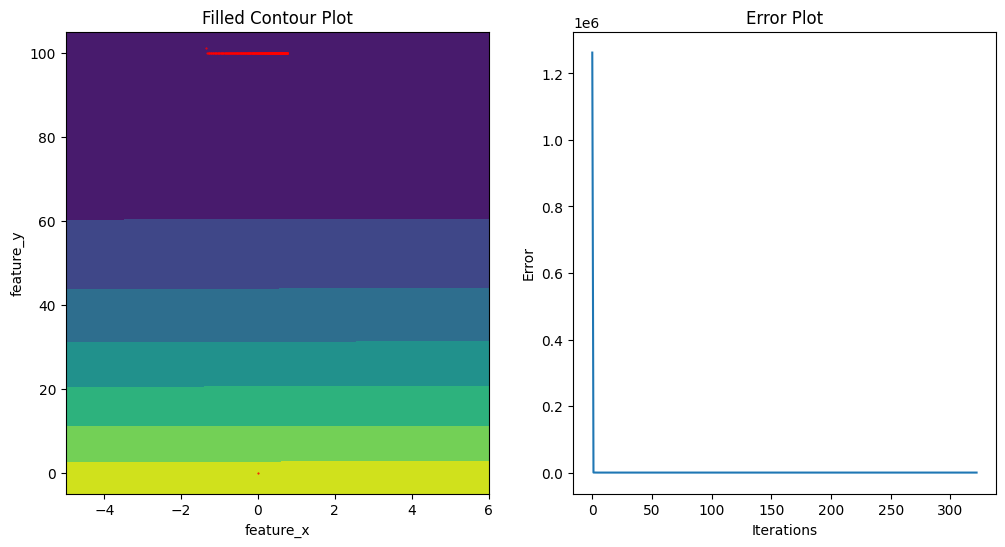

In [5]:
# Dataset 1 
epsilon = 0.001
alpha = 0.0001

A = GD(epsilon,alpha)
A.train(*DataSet1())

print(A.epoch)
print(A.theta)
A.plotit(show = True)

22
[[3.91050093]
 [2.35828868]]


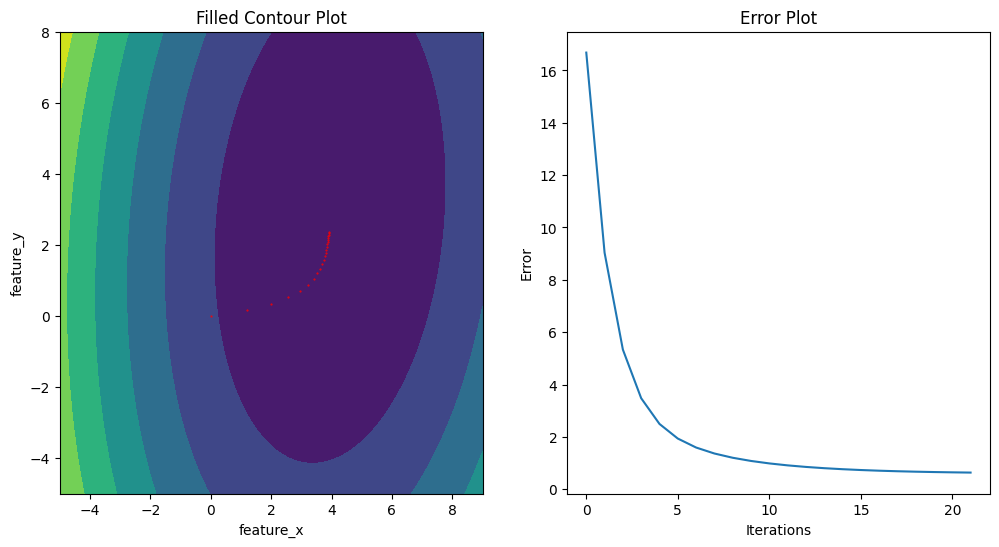

In [7]:
# Dataset 2
epsilon = 0.001
alpha = 0.004

A = GD(epsilon,alpha)
A.train(*DataSet2())

print(A.epoch)
print(A.theta)
A.plotit(show = True)